In [37]:
#Imports
import re
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [38]:
#Data
df = pd.read_csv('prod_data.csv')

df['text'] = [re.sub(r'\d+', 'number',i) for i in df['text']]
df['text'] = [re.sub(r'poly', 'poly poly',i) for i in df['text']]

In [39]:
#Splitting
X = df['text']
y = df['verdict']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, ) #random_state=0

In [40]:
#CountVectorizer
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3)) #stop_words='english'
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [41]:
#Training
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [42]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 94.50%


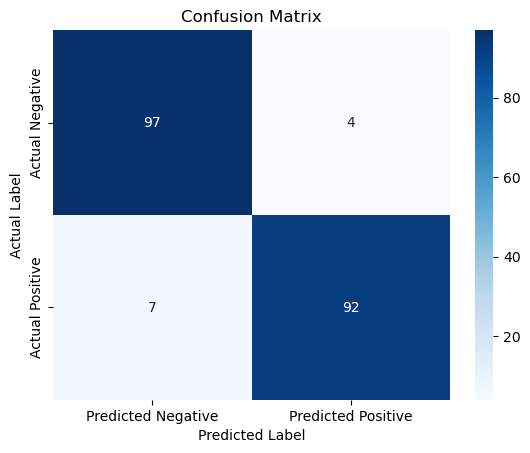

In [43]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()